In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [27]:
df = pd.read_excel("combined.xlsx")
df.describe()

,epoch,neurons,training time for ELM,testing time per image,precision,recall,f1 score,accuracy,sensitivity,specificity,false positive rate,error
count,50.00000,50.000000,50.000000,42.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,10.000000
mean,20.00000,288.000000,4.267786,2.379235,0.740841,0.954220,0.834048,0.810662,0.954220,0.668125,0.330021,0.203047
std,8.08122,127.998724,1.430992,0.427269,0.022314,0.020281,0.021170,0.025167,0.020281,0.032644,0.032268,0.019493
min,10.00000,100.000000,2.472322,1.673210,0.694953,0.902500,0.785466,0.754380,0.902500,0.594903,0.264604,0.178195
25%,10.00000,200.000000,3.398288,2.014949,0.722345,0.942792,0.820126,0.795026,0.942792,0.644341,0.303492,0.190484
50%,20.00000,300.000000,4.021910,2.392627,0.741627,0.960583,0.836176,0.813086,0.960583,0.671934,0.327486,0.198123
75%,30.00000,400.000000,4.694539,2.797451,0.756340,0.968500,0.849553,0.828780,0.968500,0.690634,0.351605,0.215644
max,30.00000,500.000000,11.327227,3.173465,0.785311,0.981167,0.869869,0.854687,0.981167,0.735396,0.405097,0.242298


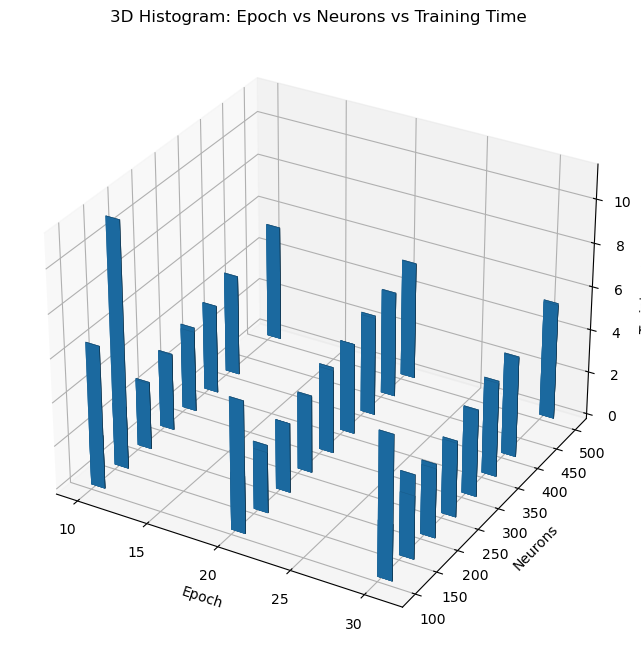

In [28]:

# # Convert necessary columns to the appropriate data types
df['epoch'] = df['epoch'].astype(int)
df['neurons'] = df['neurons'].astype(int)
df['training time for ELM'] = df['training time for ELM'].astype(float)

# Create the 3D histogram
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
hist = ax.bar3d(df['epoch'], df['neurons'], 0, 1, 1, df['training time for ELM'])

# Set labels and title
ax.set_xlabel('Epoch')
ax.set_ylabel('Neurons')
ax.set_zlabel('Training Time')
ax.set_title('3D Histogram: Epoch vs Neurons vs Training Time')

# Show the plot
plt.show()

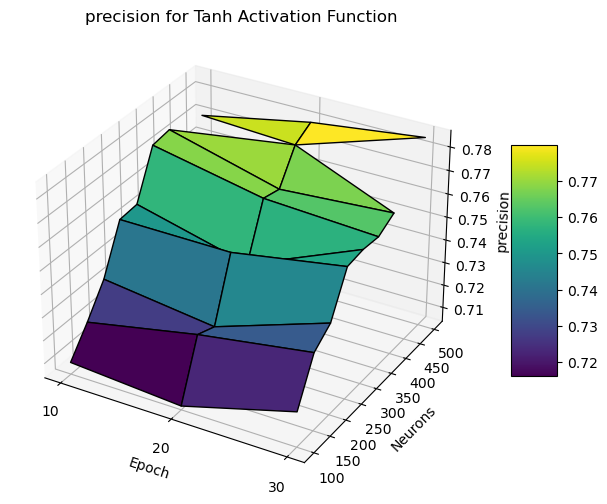

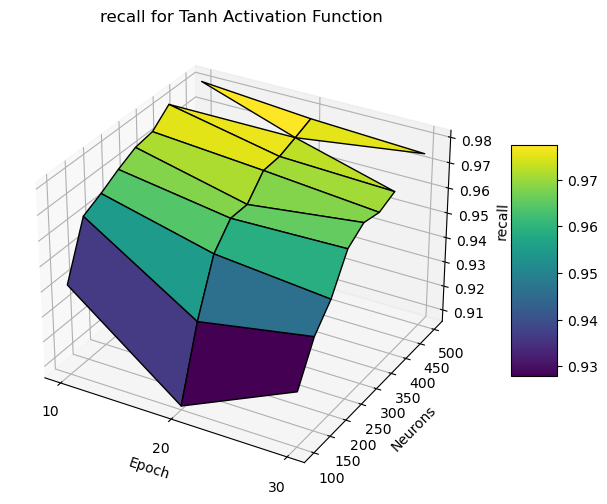

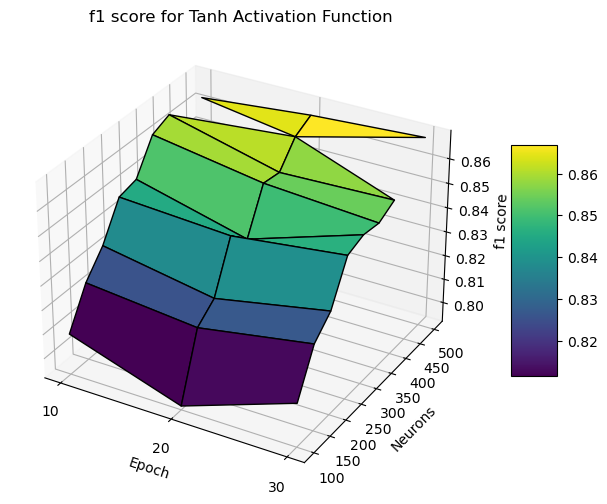

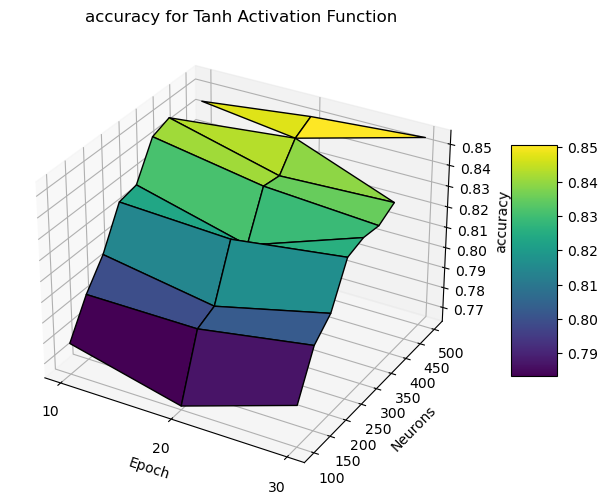

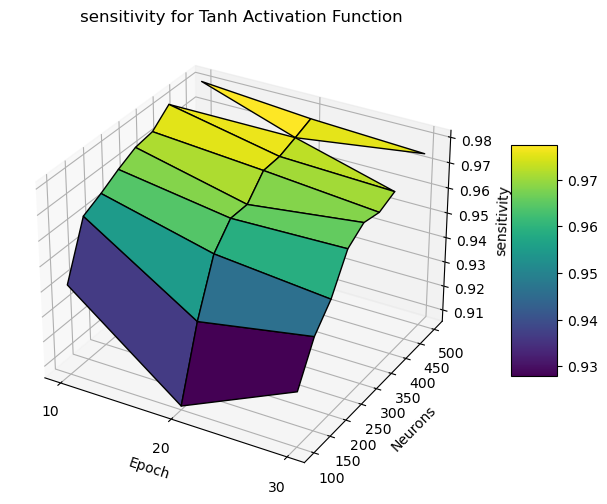

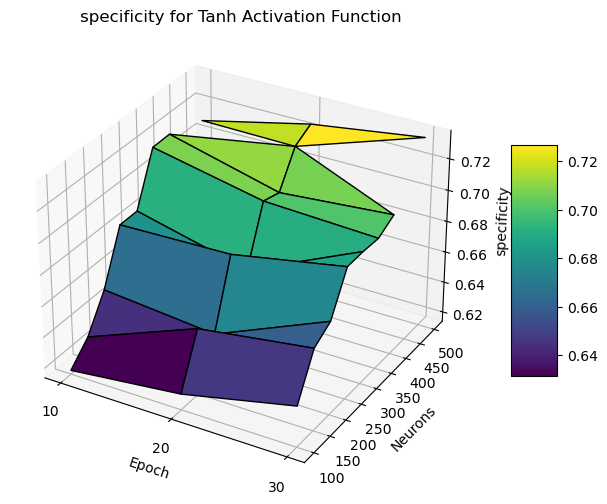

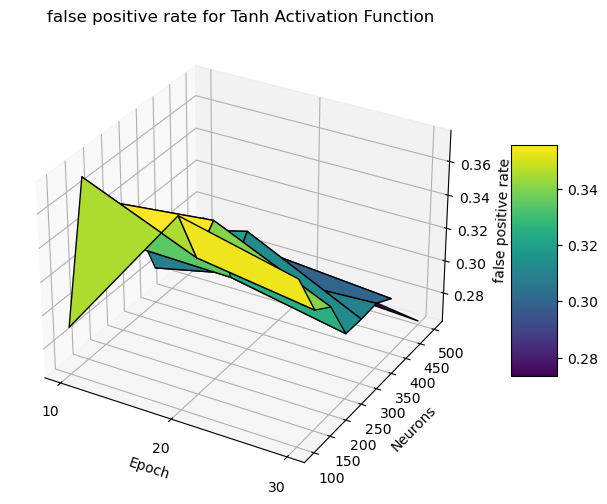

In [29]:
# Filter data for "tanh" activation function
df_tanh = df[df['activation'] == 'tanh']

# Define the performance metrics
performance_metrics = ['precision', 'recall', 'f1 score', 'accuracy', 'sensitivity', 'specificity', 'false positive rate']

# Create a separate surface plot for each performance metric
for metric in performance_metrics:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Generate meshgrid for epoch and neurons
    epochs = [10, 20, 30]
    neurons = np.unique(df_tanh['neurons'])
    X, Y = np.meshgrid(epochs, neurons)

    # Extract performance values for each combination of epoch and neurons
    Z = []
    for neuron in neurons:
        row = []
        for epoch in epochs:
            value = df_tanh[(df_tanh['neurons'] == neuron) & (df_tanh['epoch'] == epoch)][metric].values
            row.append(value[0] if len(value) > 0 else np.nan)
        Z.append(row)

    # Convert Z to numpy array
    Z = np.array(Z)

    # Create surface plot
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Neurons')
    ax.set_zlabel(metric)
    ax.set_title(f'{metric} for Tanh Activation Function')
    ax.set_xticks(epochs)
    ax.set_yticks(neurons)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    plt.show()


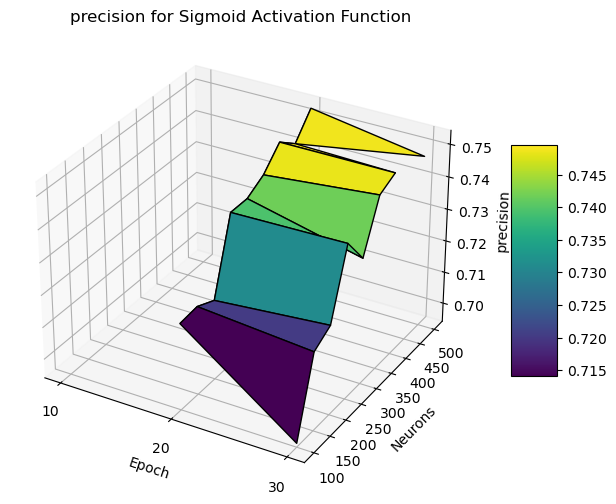

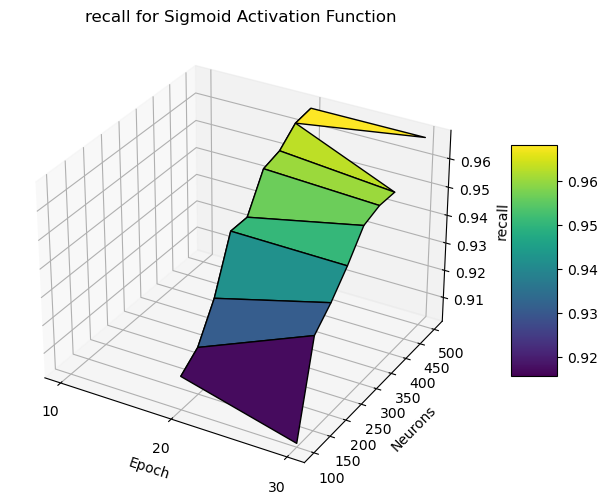

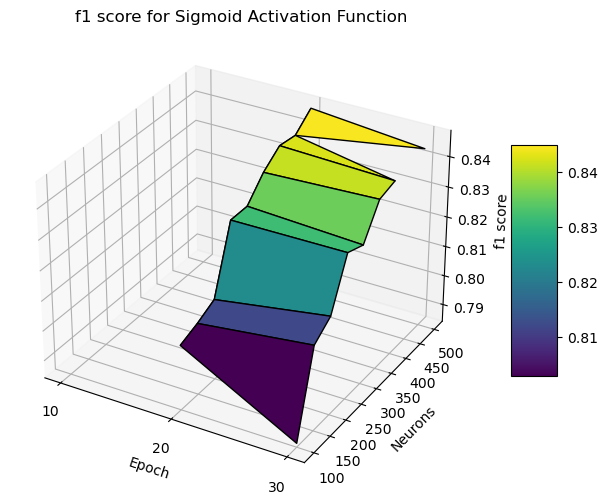

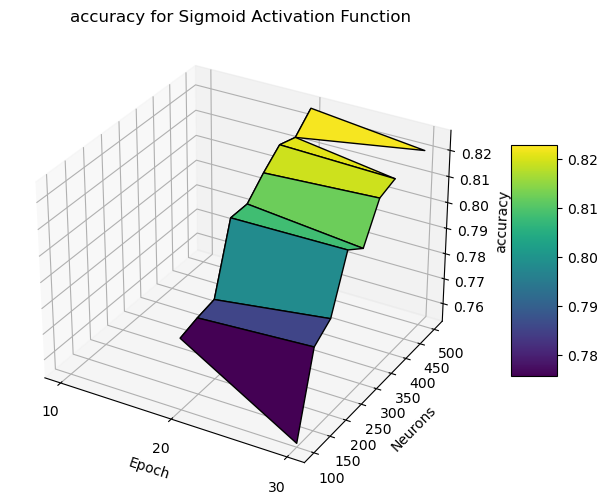

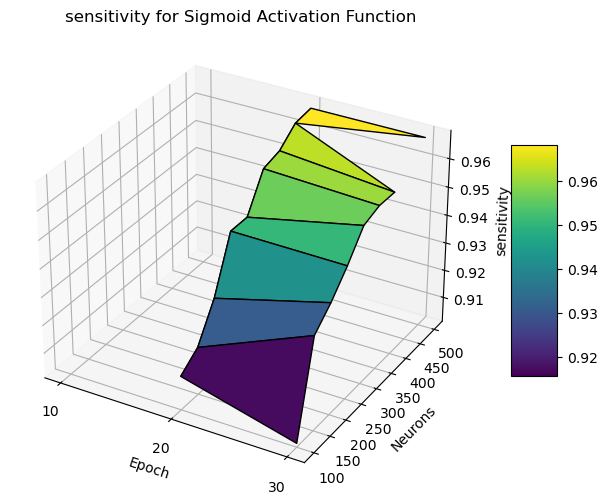

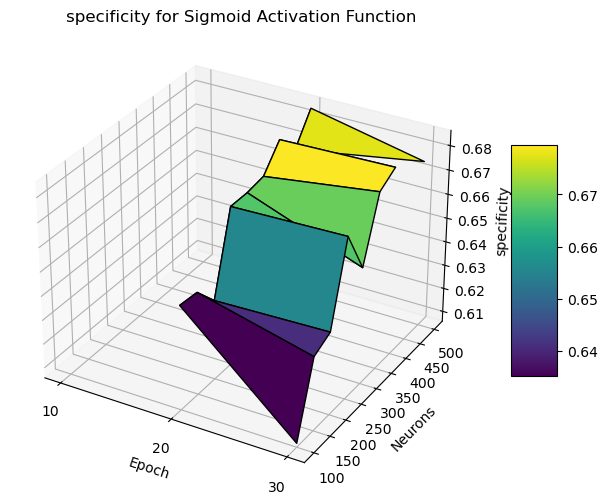

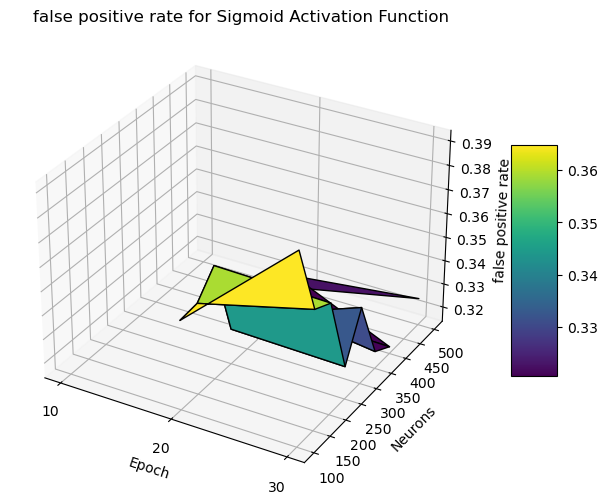

In [30]:
# Filter data for "sigm" activation function
df_sigm = df[df['activation'] == 'sigm']

# Define the performance metrics
performance_metrics = ['precision', 'recall', 'f1 score', 'accuracy', 'sensitivity', 'specificity', 'false positive rate']

# Create a separate surface plot for each performance metric
for metric in performance_metrics:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Generate meshgrid for epoch and neurons
    epochs = [10, 20, 30]
    neurons = np.unique(df_sigm['neurons'])
    X, Y = np.meshgrid(epochs, neurons)

    # Extract performance values for each combination of epoch and neurons
    Z = []
    for neuron in neurons:
        row = []
        for epoch in epochs:
            value = df_sigm[(df_sigm['neurons'] == neuron) & (df_sigm['epoch'] == epoch)][metric].values
            row.append(value[0] if len(value) > 0 else np.nan)
        Z.append(row)

    # Convert Z to numpy array
    Z = np.array(Z)

    # Create surface plot
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Neurons')
    ax.set_zlabel(metric)
    ax.set_title(f'{metric} for Sigmoid Activation Function')
    ax.set_xticks(epochs)
    ax.set_yticks(neurons)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    plt.show()
